In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def load_img():
    blank_img =np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCDE',org=(50,300), fontFace=font,fontScale= 5,color=(255,255,255),thickness=25,lineType=cv2.LINE_AA)
    return blank_img

In [5]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

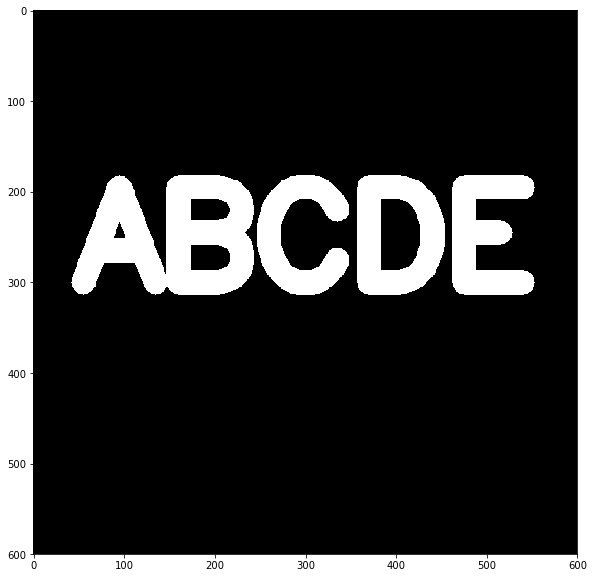

In [11]:
img = load_img()
display_img(img)

In [8]:
kernel = np.ones((5,5), dtype=np.uint8)
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

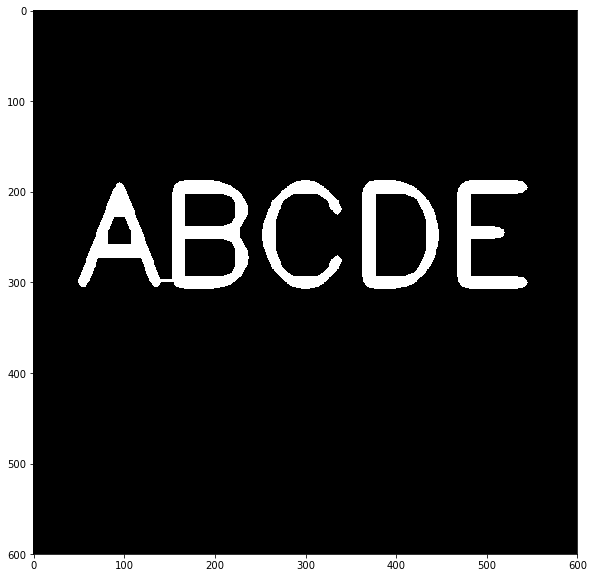

In [12]:
result = cv2.erode(img, kernel, iterations=3)
display_img(result)

In [13]:
def show():
    img = load_img()
    display_img(img)

In [14]:
img = load_img()

In [15]:
white_noise = np.random.randint(low=0, high=2, size=(600,600))

In [16]:
white_noise

array([[1, 1, 1, ..., 1, 0, 1],
       [1, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 0, 0]])

In [17]:
img.max()

255.0

In [18]:
white_noise = white_noise * 255

In [19]:
white_noise

array([[255, 255, 255, ..., 255,   0, 255],
       [255, 255,   0, ...,   0,   0, 255],
       [  0, 255,   0, ..., 255, 255,   0],
       ...,
       [  0,   0, 255, ...,   0,   0,   0],
       [255,   0,   0, ..., 255,   0,   0],
       [255, 255, 255, ..., 255,   0,   0]])

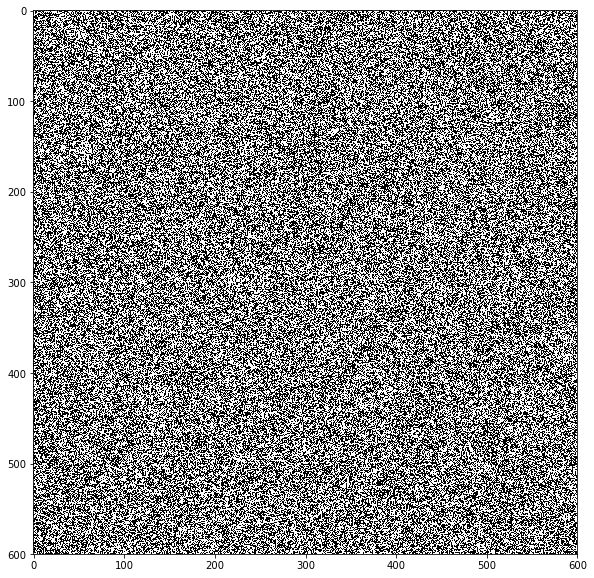

In [20]:
display_img(white_noise)

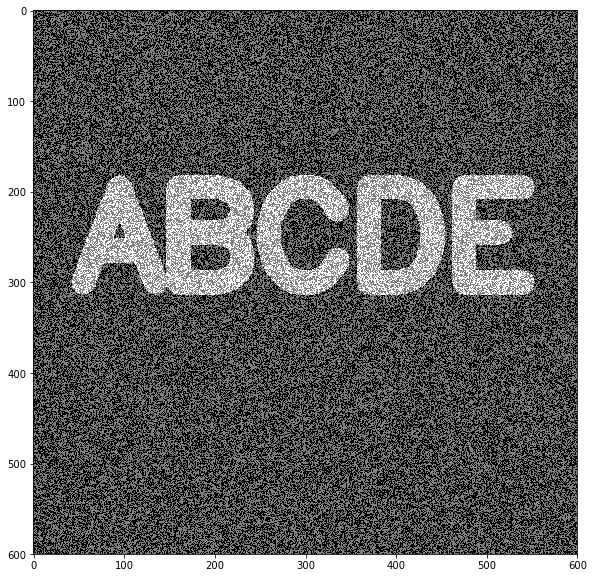

In [21]:
noise_img = white_noise + img
display_img(noise_img)

In [22]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)

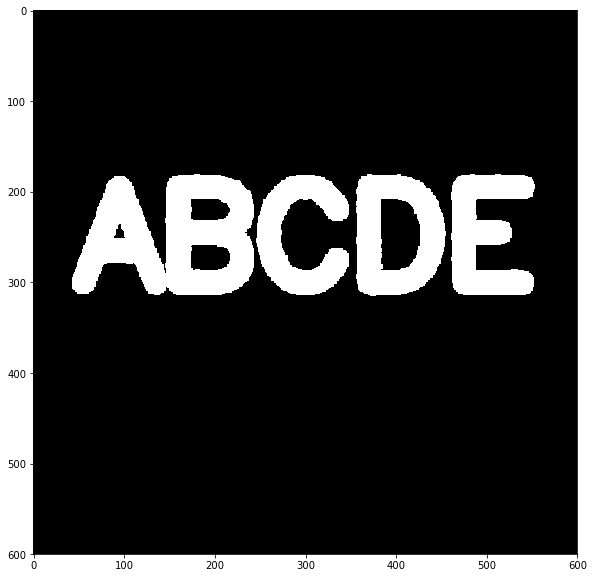

In [23]:
display_img(opening)

In [24]:
black_noise = np.random.randint(low=0, high=2, size=(600,600))
black_noise

array([[1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 1],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 1, ..., 1, 1, 1],
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
black_noise = black_noise * -255
black_noise

array([[-255, -255,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0, -255, -255],
       [-255,    0, -255, ...,    0,    0,    0],
       ...,
       [   0, -255, -255, ..., -255, -255, -255],
       [-255,    0,    0, ..., -255,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]])

In [26]:
black_noise_img = img + black_noise
black_noise_img

array([[-255., -255.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0., -255., -255.],
       [-255.,    0., -255., ...,    0.,    0.,    0.],
       ...,
       [   0., -255., -255., ..., -255., -255., -255.],
       [-255.,    0.,    0., ..., -255.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

In [27]:
black_noise_img[black_noise_img == -255] = 0

In [29]:
black_noise_img.min()

0.0

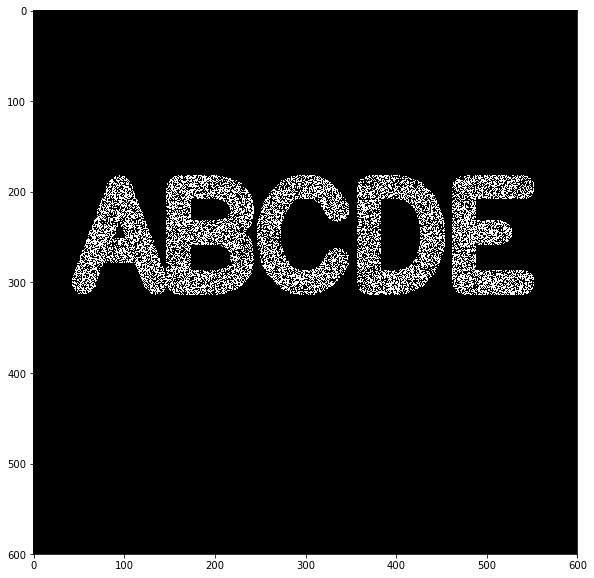

In [31]:
display_img(black_noise_img)

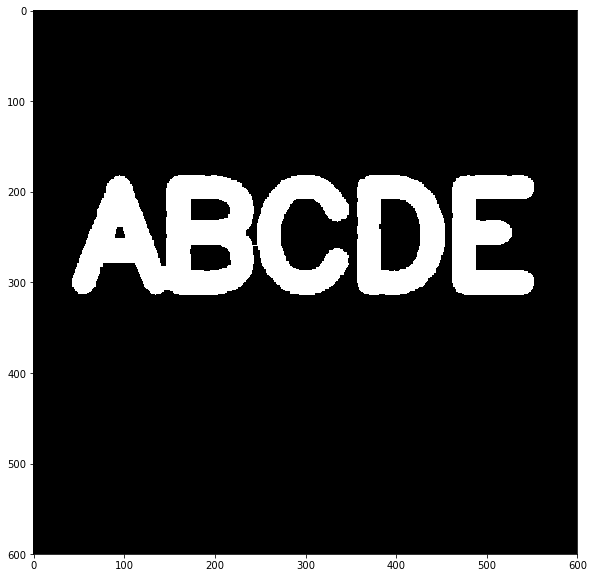

In [32]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)
display_img(closing)

In [33]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

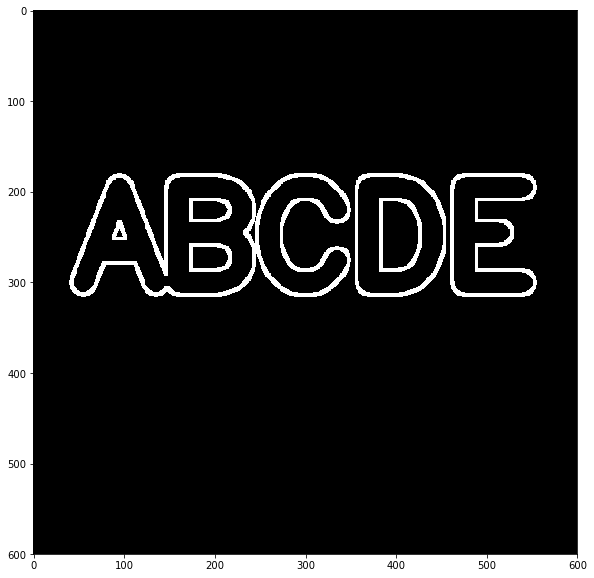

In [34]:
display_img(gradient)

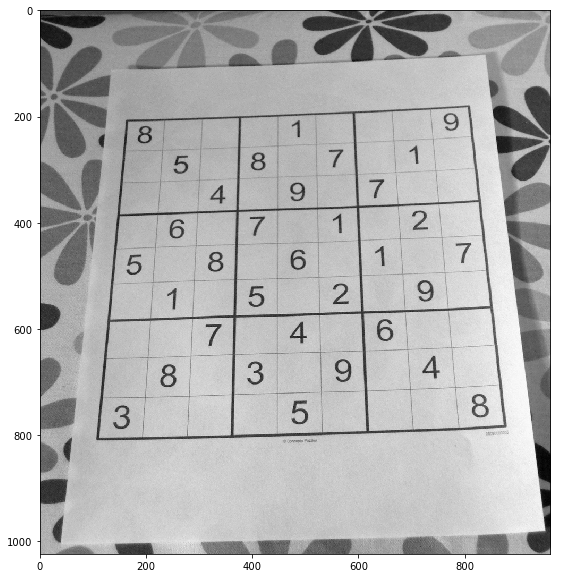

In [36]:
img = cv2.imread("Computer-Vision-with-Python/DATA/sudoku.jpg", 0)
display_img(img)

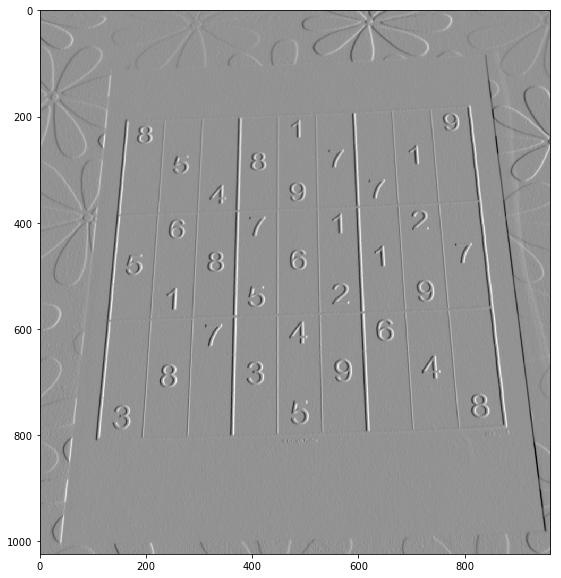

In [37]:
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
display_img(sobelx)

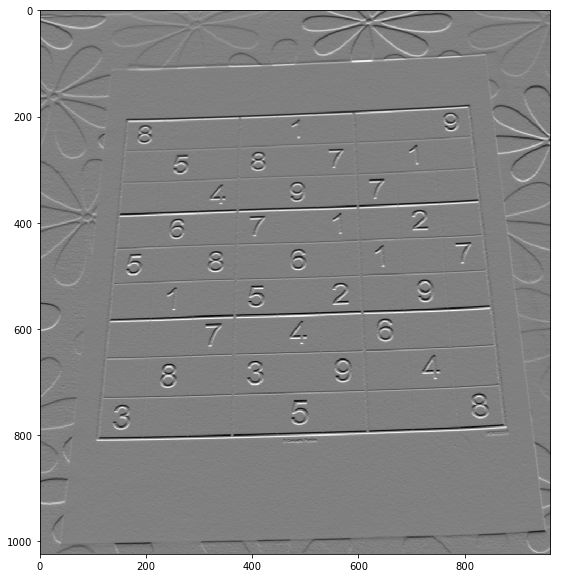

In [38]:
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
display_img(sobely)

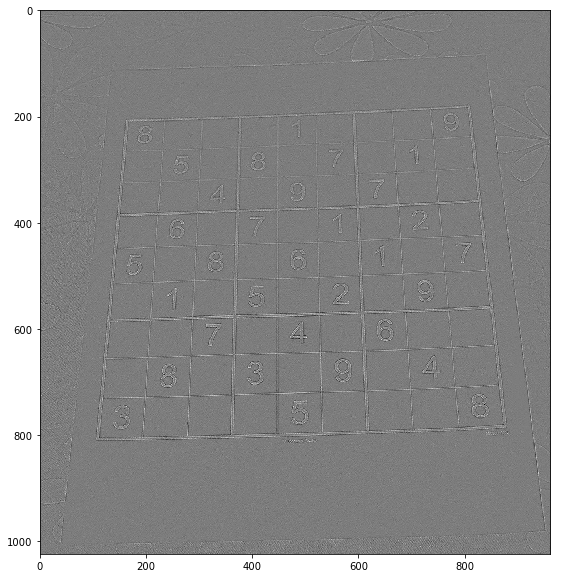

In [39]:
laplacian = cv2.Laplacian(img, cv2.CV_64F)
display_img(laplacian)

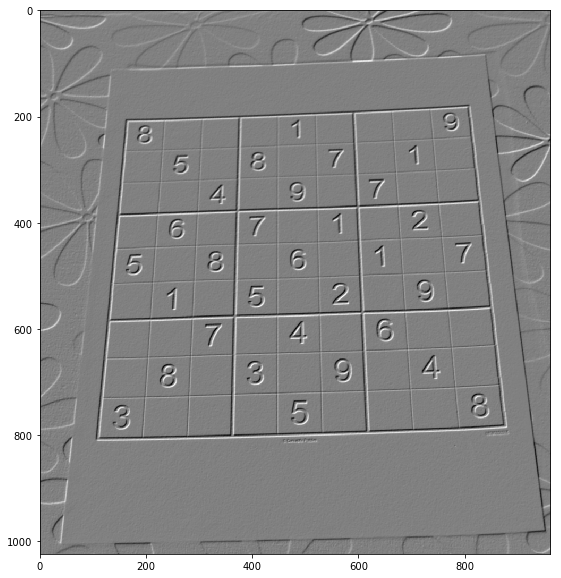

In [40]:
blend = cv2.addWeighted(src1=sobelx, alpha=0.5, src2=sobely, beta=0.6, gamma=0)
display_img(blend)

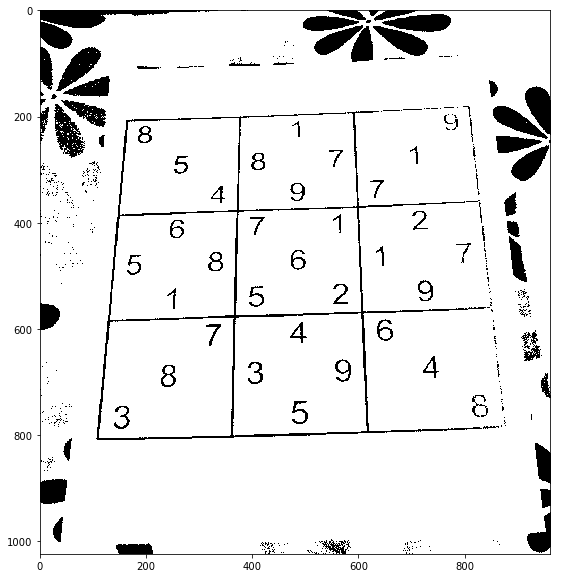

In [41]:
ret, th1 = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
display_img(th1)

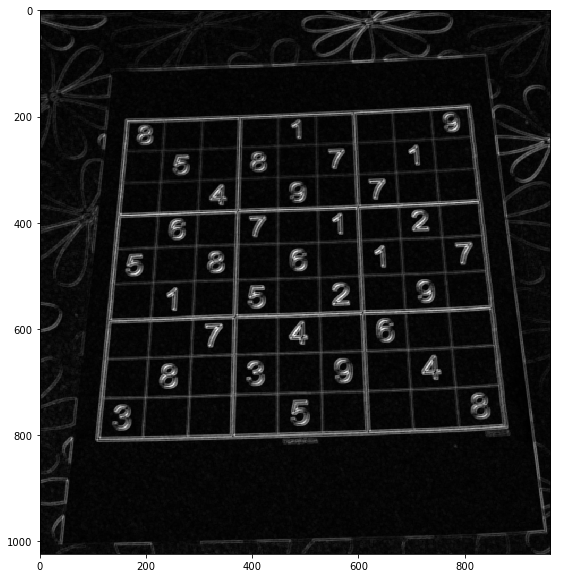

In [42]:
kernel = np.ones((4,4), np.uint8)
gradient = cv2.morphologyEx(blend, cv2.MORPH_GRADIENT, kernel)
display_img(gradient)